In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print(f"""
Filas    : {df.shape[0]}
Columnas : {df.shape[1]}""")


Filas    : 400
Columnas : 5


In [4]:
df.describe().loc[:, ['Age', 'EstimatedSalary']]

,Age,EstimatedSalary
count,400.000,400.000
mean,37.655,69742.500
std,10.483,34096.960
min,18.000,15000.000
25%,29.750,43000.000
50%,37.000,70000.000
75%,46.000,88000.000
max,60.000,150000.000


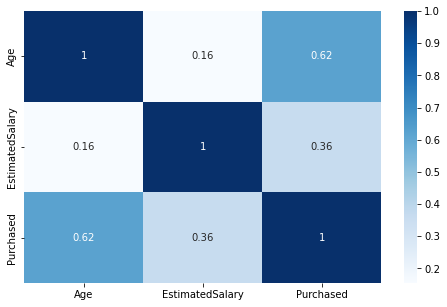

In [5]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap="Blues");

## 1. ¿Los varones tienen un salario mayor a las mujeres?

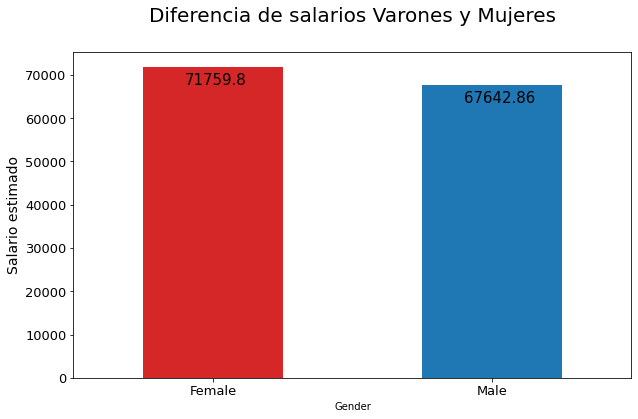

In [6]:
ax = (df.groupby("Gender")['EstimatedSalary'].mean().plot
 .bar(rot=0, color=["tab:red", "tab:blue"],
      figsize=(10, 6), fontsize=13)
)
ax.set_title('Diferencia de salarios Varones y Mujeres', size=20, pad=30)
ax.set_ylabel('Salario estimado', fontsize=14)
for i in ax.patches:
    ax.text(i.get_x() + 0.15, i.get_height() - 4000, 
            str(round(i.get_height(), 2)), fontsize=15)

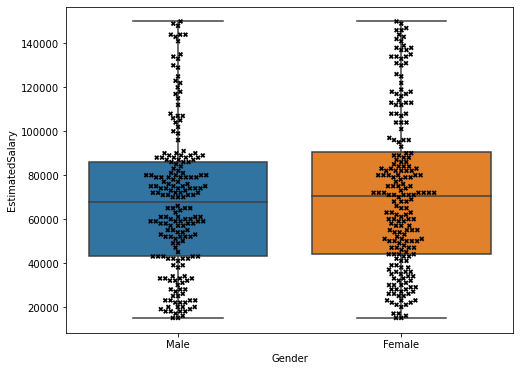

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Gender", y="EstimatedSalary", dodge=True)
sns.swarmplot(data=df, x="Gender", y="EstimatedSalary", dodge=True, color="0", marker="X");

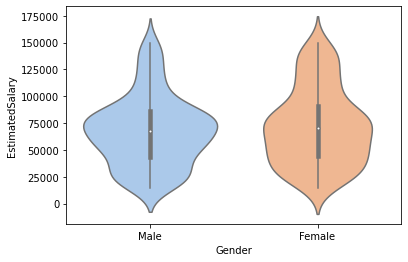

In [9]:
sns.violinplot(data=df, x="Gender", y="EstimatedSalary", palette="pastel");

### Prueba de hipotesis
$H_0$: No hay diferencia significativa en los salarios  
$H_1$: La mediana del salario de mujeres es significativamente diferente a la de los varones

In [10]:
from scipy.stats import wilcoxon

df_male = df[df['Gender']=="Male"]
df_female = df[df['Gender']=="Female"]

wt = wilcoxon(df_male['EstimatedSalary'], df_female.iloc[:196,:]['EstimatedSalary'])
wt

WilcoxonResult(statistic=8448.0, pvalue=0.16063511189882407)

> P-value > 0.05  
> Se puede concluir que no existe diferencia estadísticamente significativa en los salarios de varones y mujeres

## 2. ¿Quién es el usuario/s con mayor salario?

In [11]:
df[df["EstimatedSalary"]==df["EstimatedSalary"].max()]

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
211,15735878,Male,52,150000,1


> Los usuarios con ID `15694829` y `15735878` son quienes tienen el mayor salario  
> Estos usuarios corresponden a una mujer de 32 años y un hombre de 52 que si
> hicieron compras.

## 3. ¿En qué grupo de edad se encuentran las personas con mas compras?

In [12]:
labels = ["17-30", "30-37", "37-46", "46-60"]
df["AgeRange"] = pd.qcut(df['Age'], 4, precision=0, labels=labels)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeRange
0,15624510,Male,19,19000,0,17-30
1,15810944,Male,35,20000,0,30-37
2,15668575,Female,26,43000,0,17-30
3,15603246,Female,27,57000,0,17-30
4,15804002,Male,19,76000,0,17-30


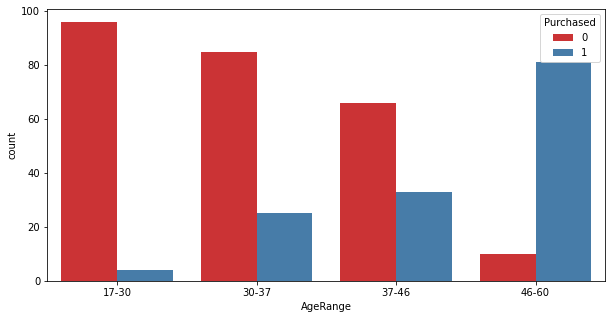

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="AgeRange", hue="Purchased", palette="Set1");

> Las personas entre 46 y 60 años hacen mas compras que el resto

## 4. ¿Cuál es la edad promedio de las personas que hacen compras?

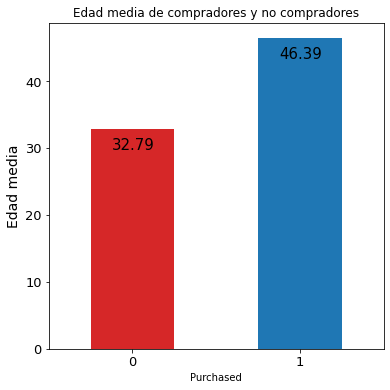

In [27]:
df.groupby("Purchased")['Age'].mean()
ax = (df.groupby("Purchased")['Age'].mean().plot
 .bar(rot=0, color=["tab:red", "tab:blue"],
      figsize=(6, 6), fontsize=13)
)
ax.set_title('Edad media de compradores y no compradores')
ax.set_ylabel('Edad media', fontsize=14)
for i in ax.patches:
    ax.text(i.get_x() + 0.13, i.get_height()-3, 
            str(round(i.get_height(), 2)), fontsize=15)

> El promedio de edad de quienes hacen compras es de 46 años

## 5.¿Quien es la persona/s con el salario mas bajo?

In [15]:
df[df["EstimatedSalary"]==df["EstimatedSalary"].min()]

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeRange
43,15792008,Male,30,15000,0,30-37
92,15809823,Male,26,15000,0,17-30
150,15679651,Female,26,15000,0,17-30
155,15610140,Female,31,15000,0,30-37


> Existen 4 personas con un salario de 1500USD anual:  
> 2 varones de 30 y 26 años, 2 mujeres de 26 y 31 años  
> los 4 no hacen compras